In [43]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.integral import grid
from Models.clustering import EMIFCF, IFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [45]:
# Load the .npz file
IR_value = [1,5,10,20,30,40,50,60,70]               # tỉ lệ số mẫu lớn/nhỏ
IR = IR_value[8]      
mu_value = [5,4,3]
mu = mu_value[1]          # khoảng cách giữa 2 cụm    
data = np.load(f"../dataset/G_{mu}_data_{IR}.npz")
F_data = data['G_data']
grid_x = data['grid_x']
bandwidth = data['bandwidth']

In [ ]:
# ==== Các biến khởi tạo cho EM-IFCM ====
grid_x         = grid_x          # (np.ndarray) lưới rời rạc cho PDF
num_clusters   = 2               # (int) số cụm K
fuzziness      = 2               # (float) m > 1
max_iterations = 200             # (int) số vòng lặp tối đa
tolerance      = 1e-6            # (float) ngưỡng hội tụ
init           = 'random'        # (str) khởi tạo tâm: 'random' | 'kmeans++'
bandwidth      = bandwidth       # (float) h cho khoảng cách kernel
distance_metric= 'BC'            # (str) tên metric trong Dist: 'L1','L2','H','BC','KL',...
delta_prime    = 0.001            # (float) δ' (0.005–0.2)
verbose        = True            # (bool) in log hay không
Dim            = None            # (int | None) 1D hoặc 2D PDF
seed           = None            # (int | None) random seed
eps            = 1e-12           # (float) epsilon chống chia 0


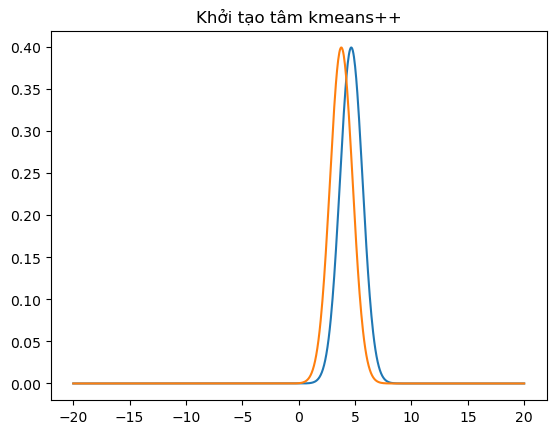

[EM-IFCM] it=001 | dU=8.919e+00 | dΘ=0.000e+00 | ΔJ=inf | J=9.762108e+02 | edge=4.871e-01 | IFCM=9.757e+02
[EM-IFCM] it=002 | dU=1.488e+00 | dΘ=1.422e-02 | ΔJ=5.340e+01 | J=1.029608e+03 | edge=5.086e-01 | IFCM=1.029e+03
[EM-IFCM] it=003 | dU=2.804e+00 | dΘ=9.049e-03 | ΔJ=6.654e+00 | J=1.036262e+03 | edge=4.907e-01 | IFCM=1.036e+03
[EM-IFCM] it=004 | dU=4.692e+00 | dΘ=2.127e-02 | ΔJ=2.620e+01 | J=1.062466e+03 | edge=4.301e-01 | IFCM=1.062e+03
[EM-IFCM] it=005 | dU=5.549e+00 | dΘ=5.820e-02 | ΔJ=8.658e+01 | J=1.149046e+03 | edge=2.923e-01 | IFCM=1.149e+03
[EM-IFCM] it=006 | dU=3.077e+00 | dΘ=2.205e-01 | ΔJ=1.889e+02 | J=1.337930e+03 | edge=1.239e-01 | IFCM=1.338e+03
[EM-IFCM] it=007 | dU=5.183e-01 | dΘ=1.360e+00 | ΔJ=4.606e+01 | J=1.291870e+03 | edge=4.158e-02 | IFCM=1.292e+03
[EM-IFCM] it=008 | dU=1.626e+00 | dΘ=1.303e+00 | ΔJ=6.082e+02 | J=6.836328e+02 | edge=1.493e-01 | IFCM=6.835e+02
[EM-IFCM] it=009 | dU=1.981e+00 | dΘ=3.941e-02 | ΔJ=3.775e+02 | J=3.061571e+02 | edge=5.444e-02 | IFCM

In [47]:
cluster_EMIFCF = EMIFCF.Model(
    grid_x=grid_x,
    num_clusters=num_clusters,
    fuzziness=fuzziness,
    max_iterations=max_iterations,
    tolerance=tolerance,
    init=init,
    bandwidth=bandwidth,
    distance_metric=distance_metric,
    verbose=verbose,
    delta_prime=delta_prime,
    Dim=Dim,
    seed=seed,
    eps=eps,
)

cluster_EMIFCF.fit(F_data)
U_EMIFCF, Theta_EMIFCF, J_EMIFCM = cluster_EMIFCF.get_results()
labels_EMIFCF = cluster_EMIFCF.get_hard_assignments()

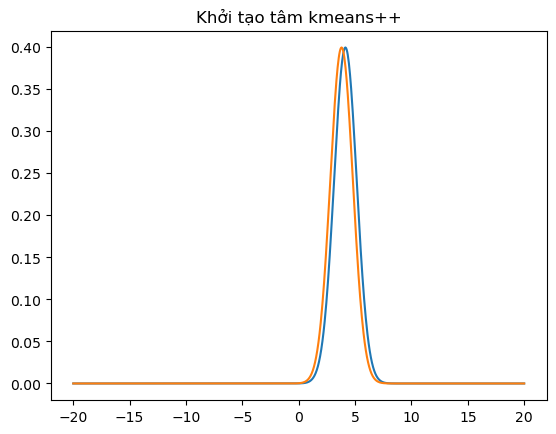

[IFCM] it=001 | dU=1.669e+01 | dTheta=2.356e-01 | ΔJ=inf | J=7.172526e+02 | f=[0.50023241 0.49976759]
[IFCM] it=002 | dU=9.397e+00 | dTheta=1.124e-01 | ΔJ=1.819e+02 | J=8.991711e+02 | f=[0.51338437 0.48661563]
[IFCM] it=003 | dU=4.919e+00 | dTheta=1.326e-01 | ΔJ=7.378e+01 | J=9.729540e+02 | f=[0.55582271 0.44417729]
[IFCM] it=004 | dU=7.097e+00 | dTheta=1.933e-01 | ΔJ=2.365e+01 | J=9.492995e+02 | f=[0.67021224 0.32978776]
[IFCM] it=005 | dU=5.228e+00 | dTheta=9.356e-01 | ΔJ=3.748e+01 | J=9.118234e+02 | f=[0.84785738 0.15214262]
[IFCM] it=006 | dU=1.161e+00 | dTheta=1.821e+00 | ΔJ=1.069e+01 | J=9.225107e+02 | f=[0.97384576 0.02615424]
[IFCM] it=007 | dU=8.614e-01 | dTheta=4.580e-02 | ΔJ=7.774e+01 | J=8.447696e+02 | f=[0.99864813 0.00135187]
[IFCM] it=008 | dU=2.262e+00 | dTheta=3.332e-02 | ΔJ=4.088e+02 | J=4.359994e+02 | f=[0.99661926 0.00338074]
[IFCM] it=009 | dU=7.961e-01 | dTheta=1.553e-02 | ΔJ=2.347e+02 | J=2.013046e+02 | f=[0.98972561 0.01027439]
[IFCM] it=010 | dU=9.849e-02 | dTh

In [48]:
cluster_IFCF = IFCF.Model(
    grid_x=grid_x,
    num_clusters=num_clusters,
    fuzziness=fuzziness,
    max_iterations=max_iterations,
    tolerance=tolerance,
    init=init,
    bandwidth=bandwidth,
    distance_metric=distance_metric,
    verbose=verbose,
    Dim=Dim,
    seed=seed,
    eps=eps,
)

cluster_IFCF.fit(F_data)
U_IFCF, Theta_IFCF, J_IFCM = cluster_IFCF.get_results()
labels_IFCF = cluster_IFCF.get_hard_assignments()

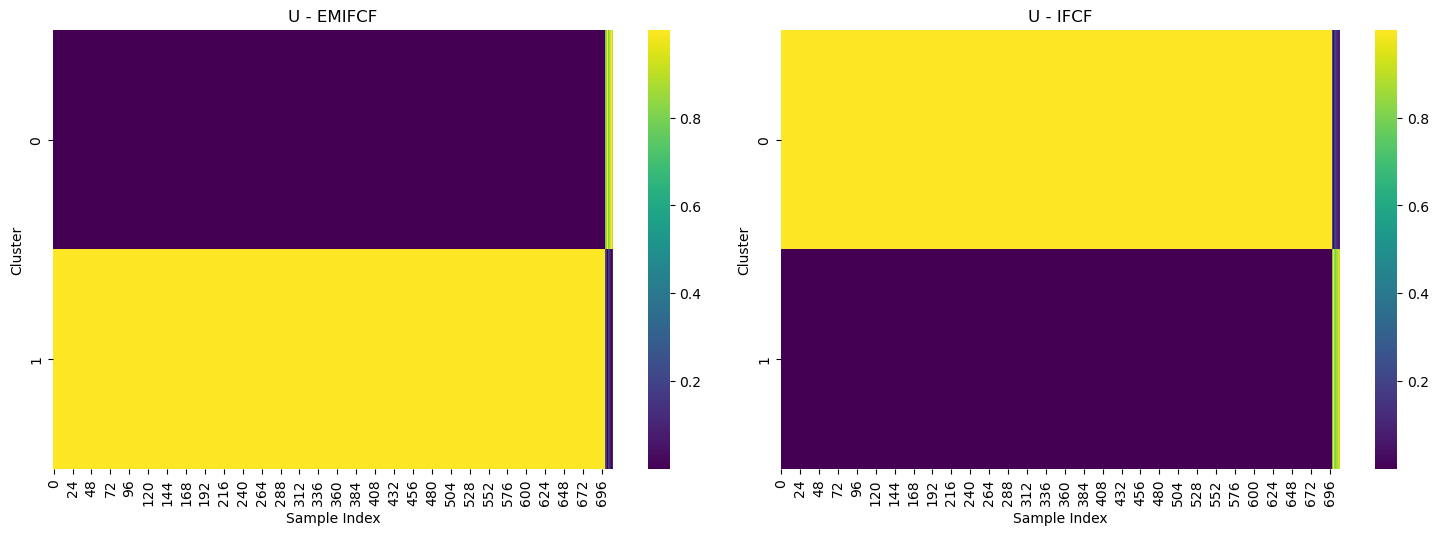

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn có nhãn cứng từ U_EMIFCF
labels_EMIFCF = np.argmax(U_EMIFCF, axis=0)
labels_IFCF   = np.argmax(U_IFCF, axis=0)

# colors = plt.cm.tab10.colors  # 10 màu mặc định
   
plt.figure(figsize=(15, 10))

# # Plot 1: Input PDFs với nhãn EMIFCF
# plt.subplot(2, 2, 1)
# for i in range(F_data.shape[0]):
#     c = colors[labels_EMIFCF[i] % len(colors)]
#     plt.plot(grid_x, F_data[i], color=c, alpha=0.3)
# for j in range(Theta_EMIFCF.shape[0]):  
#     c = colors[j % len(colors)]
#     plt.plot(grid_x, Theta_EMIFCF[j], color=c, linewidth=3, linestyle='--', label=f"θ{j+1}")
# plt.title('Input PDFs (EMIFCF)')
# plt.xlabel('grid_x'); plt.ylabel('Density')
# plt.legend()

# # Plot 2: Prototypes từ IFCF
# plt.subplot(2, 2, 2)
# for i in range(F_data.shape[0]):
#     c = colors[labels_IFCF[i] % len(colors)]
#     plt.plot(grid_x, F_data[i], color=c, alpha=0.3)
# for j in range(Theta_IFCF.shape[0]):  
#     c = colors[j % len(colors)]
#     plt.plot(grid_x, Theta_IFCF[j], color=c, linewidth=3, linestyle='--', label=f"θ{j+1}")
# plt.title('Theta - IFCF')
# plt.xlabel('grid_x')
# plt.legend()

# Plot 3: EMIFCF memberships
plt.subplot(2, 2, 3)
sns.heatmap(U_EMIFCF, cmap="viridis")
plt.title('U - EMIFCF')
plt.ylabel('Cluster'); plt.xlabel('Sample Index')

# Plot 4: IFCF memberships
plt.subplot(2, 2, 4)
sns.heatmap(U_IFCF, cmap="viridis")
plt.title('U - IFCF')
plt.ylabel('Cluster'); plt.xlabel('Sample Index')

plt.tight_layout()
plt.show()
